# 7、使用 PCA 实现降噪

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 5., size=100)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


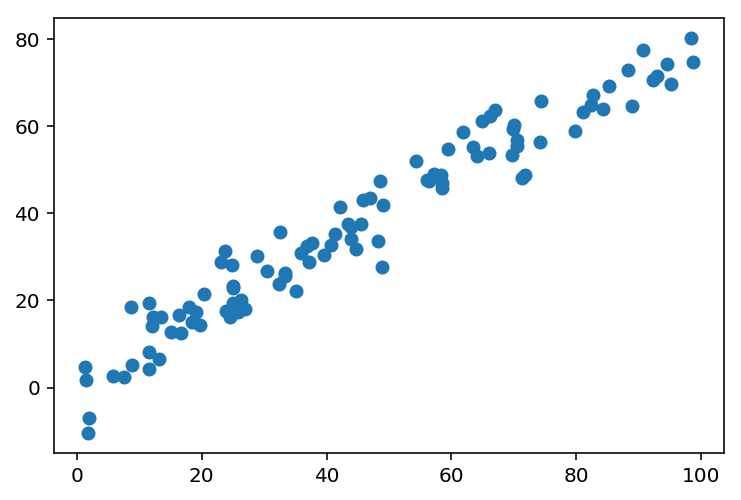

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

## 重点理解：先降维，再还原维度，丢失的是那些方差小的信息，有的时候，恰恰就是测量带来的误差

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)
X_reduction = pca.transform(X)
# 还原回去
X_restore = pca.inverse_transform(X_reduction)

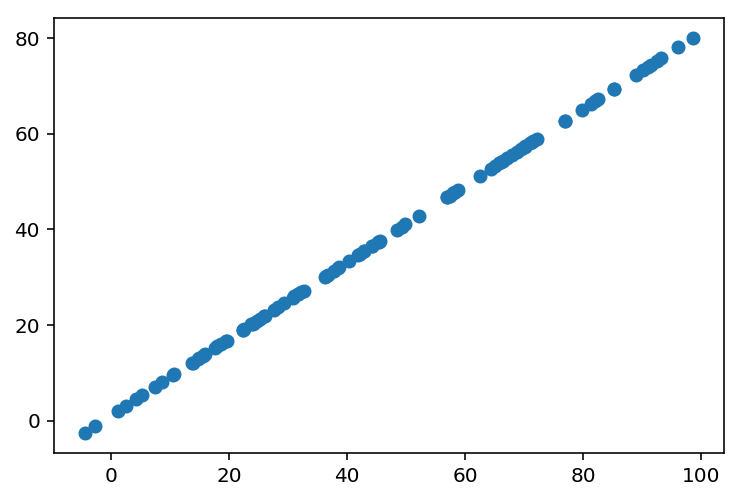

In [6]:
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

可以看到，一来一回，噪声没有了。

## 手写数字识别的例子

In [7]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [18]:
# 手动加上一些噪音
nosiy_digits = X + np.random.normal(0, 4, size=X.shape)

In [19]:
example_digits = nosiy_digits[y == 0, :][:10]
for num in range(1, 10):
    example_digits = np.vstack(
        [example_digits, nosiy_digits[y == num, :][:10]])

In [20]:
example_digits.shape

(100, 64)

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()

In [22]:
origin_digits = X[y == 0, :][:10]
for num in range(1, 10):
    origin_digits = np.vstack([origin_digits, X[y == num, :][:10]])

### 原始的手写数字识别数据

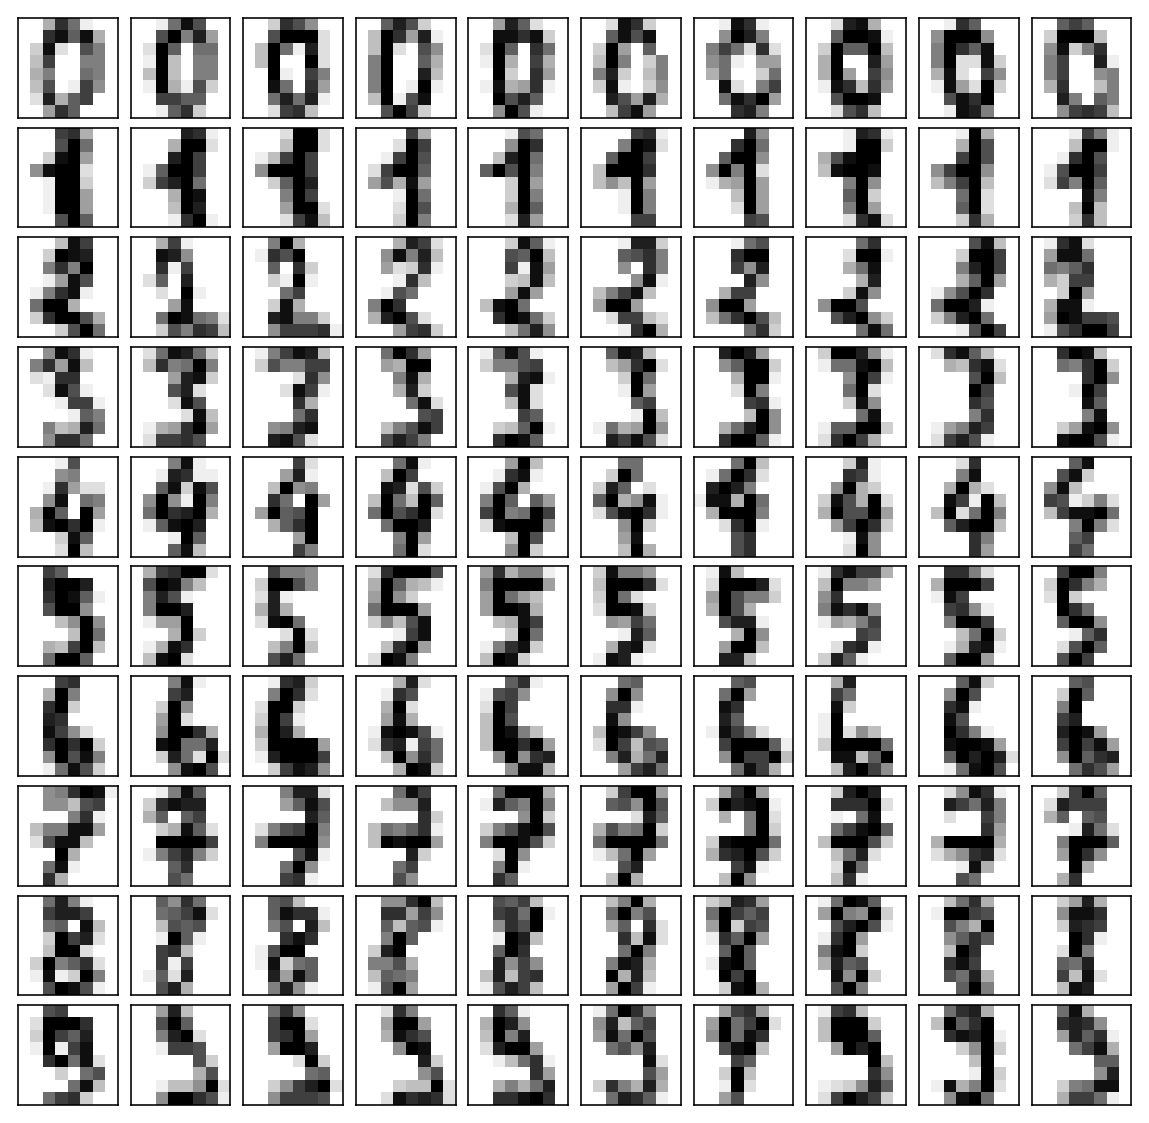

In [14]:
plot_digits(origin_digits)

### 我们手动加上噪音的手写数字识别数据

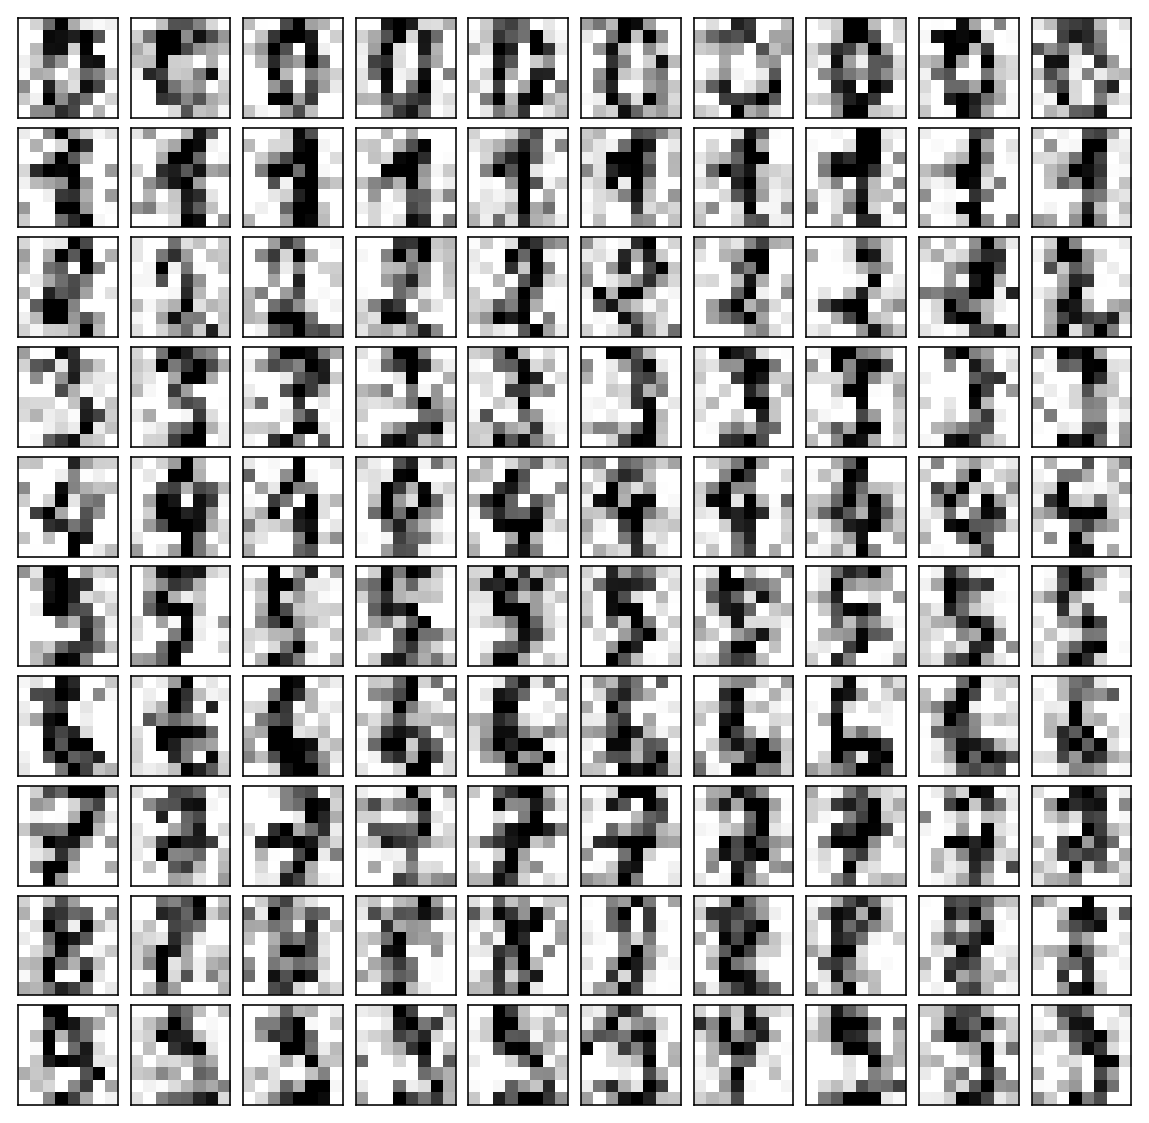

In [23]:
plot_digits(example_digits)

### 我们把手动加上噪音的手写数字识别数据进行降维，保留一半的方差

In [16]:
pca = PCA(0.5).fit(nosiy_digits)
pca.n_components_

12

### 降维以后，方差低的主成分被我们主动丢弃，然后再恢复，再绘图看看效果

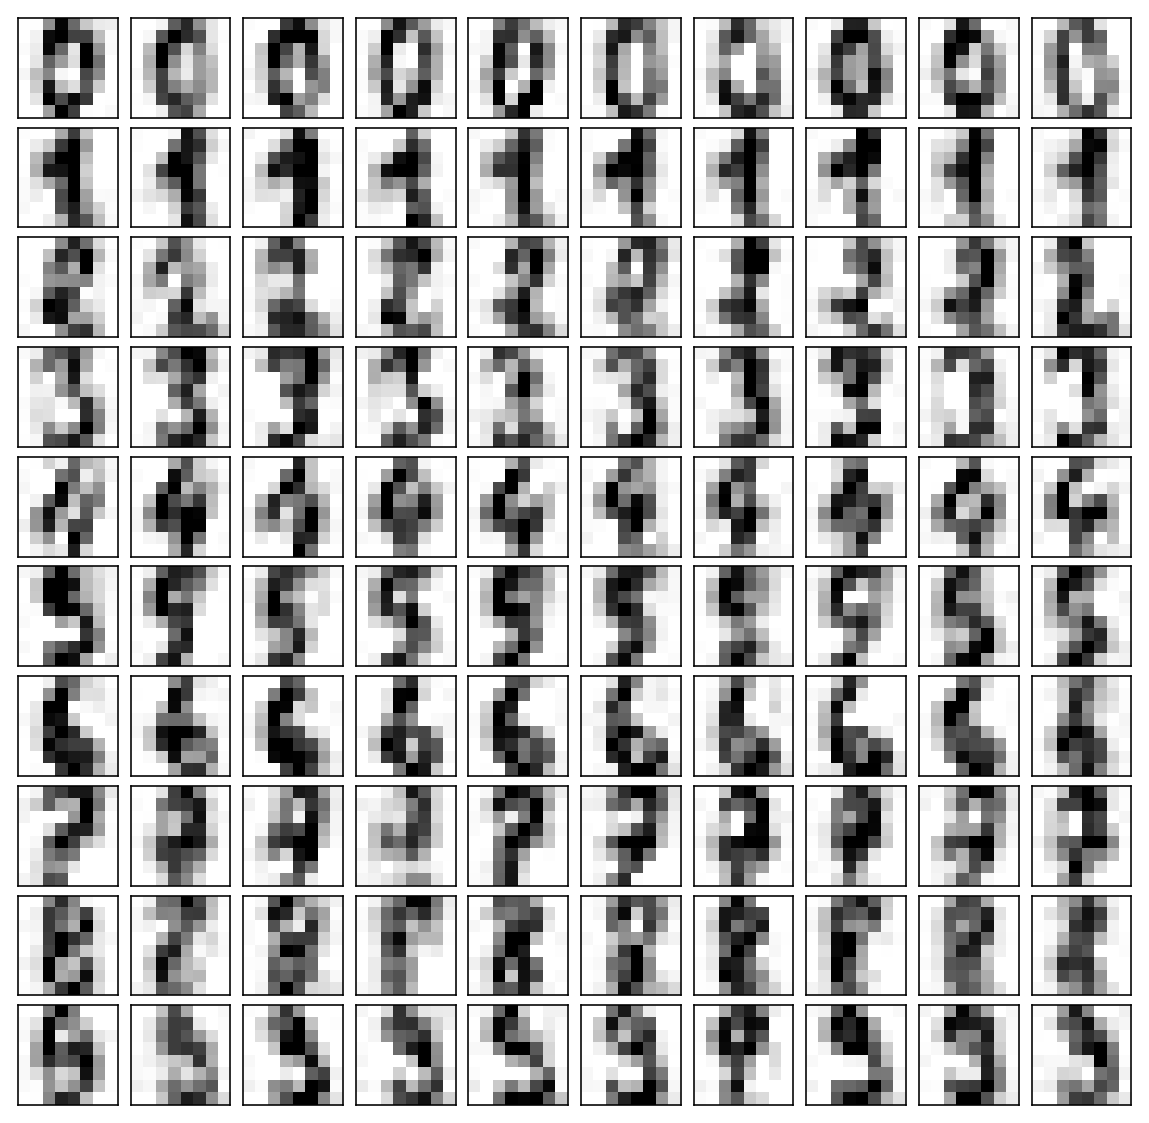

In [24]:
components = pca.transform(example_digits)
filtered_digits = pca.inverse_transform(components)
plot_digits(filtered_digits)

可以看到，比起我们手动加上噪音的时候要清晰了，因此主成分分析顺便帮我们去除了噪音。